Cargar y Preprocesar los Datos

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar el dataset de Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Entrenar y Evaluar el modelo KNN

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')
print('Informe de Clasificación:')
print(classification_report(y_test, y_pred))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(conf_matrix)

Exactitud: 1.0
Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Matriz de Confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Seleccion de Valor K

Mejor valor de K: 11


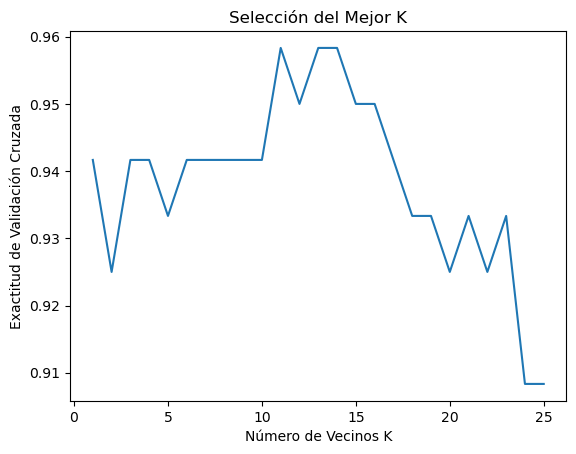

In [3]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Probar diferentes valores de K
k_values = range(1, 26)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Seleccionar el K con la mayor exactitud
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f'Mejor valor de K: {optimal_k}')

# Gráfico de la exactitud en función de K
plt.plot(k_values, cv_scores)
plt.xlabel('Número de Vecinos K')
plt.ylabel('Exactitud de Validación Cruzada')
plt.title('Selección del Mejor K')
plt.show()